In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import HTML
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#!unzip ../data/data.zip -d ../data/

In [3]:
df = pd.read_json('../data/data.json')

In [4]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [5]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [6]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
approx_payout_date,14337.0,1.350933e+09,2.401300e+07,1.171256e+09,1.334221e+09,1.355805e+09,1.370646e+09,1.523488e+09
body_length,14337.0,3.672522e+03,5.758113e+03,0.000000e+00,7.500000e+02,1.990000e+03,4.280000e+03,6.553500e+04
channels,14337.0,6.176676e+00,3.860333e+00,0.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.300000e+01
delivery_method,14321.0,4.395643e-01,5.914866e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
event_created,14337.0,1.345825e+09,2.404107e+07,1.170332e+09,1.329754e+09,1.351043e+09,1.365346e+09,1.382012e+09
event_end,14337.0,1.350501e+09,2.401299e+07,1.170824e+09,1.333789e+09,1.355373e+09,1.370214e+09,1.523056e+09
event_published,14238.0,1.340854e+09,8.750386e+07,0.000000e+00,1.329499e+09,1.351099e+09,1.365478e+09,1.381608e+09
event_start,14337.0,1.350205e+09,2.398787e+07,1.170819e+09,1.333406e+09,1.355000e+09,1.370048e+09,1.418850e+09
fb_published,14337.0,1.274325e-01,3.334685e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
gts,14337.0,2.430231e+03,9.142308e+03,0.000000e+00,1.164100e+02,4.319300e+02,1.547260e+03,3.062939e+05


In [8]:
print(df.shape)

(14337, 44)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [10]:
sample = df.iloc[0]
html_description = HTML(sample['description'])

## Scatter plots

In [11]:
#num_vars = ['body_length','channels','delivery_method','event_published','fb_published','gts']

In [12]:
#ax = scatter_matrix(df[num_vars],figsize=(8,8),diagonal = 'kde')

In [13]:
#num_vars = ['has_analytics','has_header','has_logo','name_length','num_order','num_payouts']

In [14]:
#ax = scatter_matrix(df[num_vars],figsize=(8,8),diagonal = 'kde')

In [15]:
#num_vars = ['org_facebook','org_twitter','sale_duration','show_map','user_age', 'user_type']

In [16]:
#ax = scatter_matrix(df[num_vars],figsize=(8,8),diagonal = 'kde')

In [17]:
#num_vars = ['body_length','channels','delivery_method','event_published','fb_published','gts', 'has_analytics','has_header','has_logo','name_length','num_order','num_payouts','org_facebook','org_twitter','sale_duration','show_map','user_age', 'user_type']

In [18]:
#ax = scatter_matrix(df[num_vars],figsize=(12,12),diagonal = 'kde')

## Clean up data

In [19]:
from scrubbington import scrub_everything, scrub_fraud_no_fraud, scrub_datetime

In [20]:
df = pd.read_json('../data/data.json')

In [21]:
feature_names = ['acct_type', 'org_name']

In [22]:
df_test, y, X = scrub_everything(df, feature_names)

## Histograms

In [23]:
unique_orgs = len(df_test['org_name'].unique())
print("number of org names: {}".format(unique_orgs))

number of org names: 9501


In [24]:
df2 = df_test['org_name']

In [25]:
L = list(df2)
M = Counter(L)

In [26]:
c = dict(M)

In [27]:
# for key in c:
#     print(key, c[key])

In [28]:
# Remove the unanimous org names
N = sorted(list(M.values()), reverse=True)
T = N[1:]

In [29]:
print("Number of posts by unanimous orgs: {}".format(N[0]))

Number of posts by unanimous orgs: 1462


### Histograms with and without posts by anonymous orgs

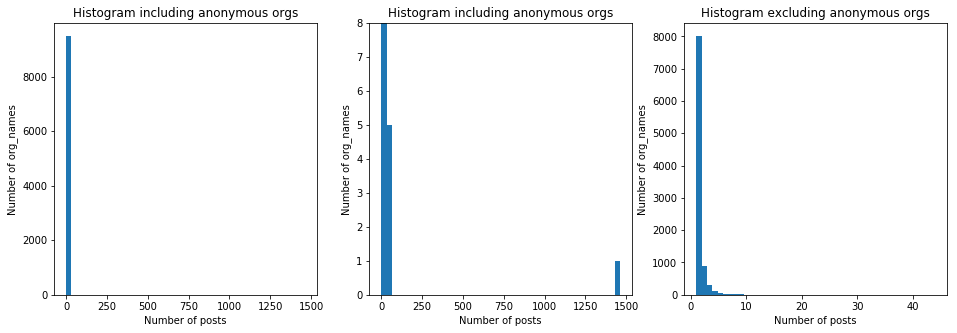

In [30]:
fig, ax = plt.subplots(1,3, figsize=(16,5))
ax[0].hist(N,bins=45);
ax[0].set_xlabel('Number of posts')
ax[0].set_ylabel('Number of org_names')
ax[0].set_title('Histogram including anonymous orgs');
ax[1].hist(N,bins=45);
ax[1].set_xlabel('Number of posts')
ax[1].set_ylabel('Number of org_names')
ax[1].set_ylim(0,8)
ax[1].set_title('Histogram including anonymous orgs');
ax[2].hist(T,bins=45);
ax[2].set_xlabel('Number of posts')
ax[2].set_ylabel('Number of org_names')
ax[2].set_title('Histogram excluding anonymous orgs');

### Histogram for orgs with more than 2 posts

In [31]:
L2 = []
for x in T:
    if x > 2:
        L2.append(x)

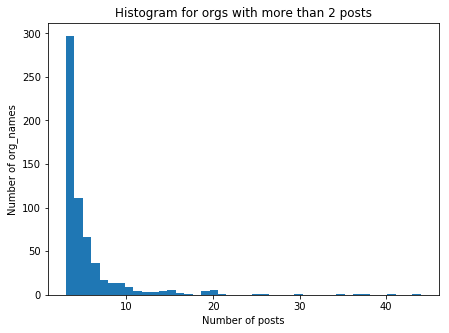

In [32]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(L2,bins=42);
plt.xlabel('Number of posts');
plt.ylabel('Number of org_names');
ax.set_title('Histogram for orgs with more than 2 posts');

### Histogram of orgs with more than 3 posts

In [33]:
L3 = []
for x in T:
    if x > 3:
        L3.append(x)

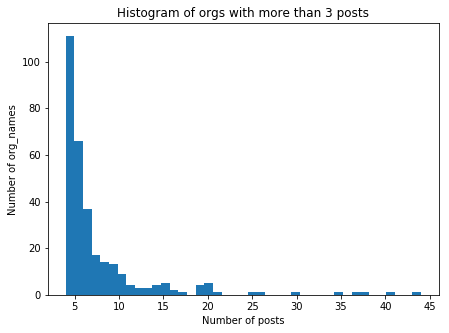

In [34]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(L3,bins=41);
plt.xlabel('Number of posts');
plt.ylabel('Number of org_names');
ax.set_title('Histogram of orgs with more than 3 posts');

### Histogram of fraud for all orgs

In [35]:
df3 = df_test[['org_name', 'fraud_no_fraud']]

In [36]:
fraud_df3 = df3[df_test['fraud_no_fraud']==True]

In [53]:
#df_test['fraud_no_fraud']==True

In [37]:
# fraud_df3['org_name'].value_counts()

In [38]:
# Org names with fraud
fraud_L = fraud_df3.iloc[:,0]

In [39]:
# Creating dictionay with fraud counts per org
fraud_M = Counter(fraud_L)

In [40]:
fraud_N = list(fraud_M.values())

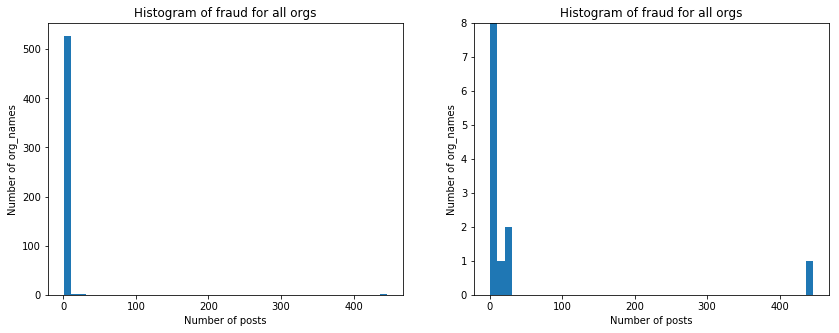

In [41]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].hist(fraud_N,bins=45);
ax[0].set_xlabel('Number of posts');
ax[0].set_ylabel('Number of org_names');
ax[0].set_title('Histogram of fraud for all orgs');
ax[1].hist(fraud_N,bins=45);
ax[1].set_xlabel('Number of posts');
ax[1].set_ylabel('Number of org_names');
ax[1].set_ylim(0,8)
ax[1].set_title('Histogram of fraud for all orgs');

### Histogram of fraud with more than 3 postings

In [42]:
FL2 = []
for x in fraud_N:
    if x > 3:
        FL2.append(x)

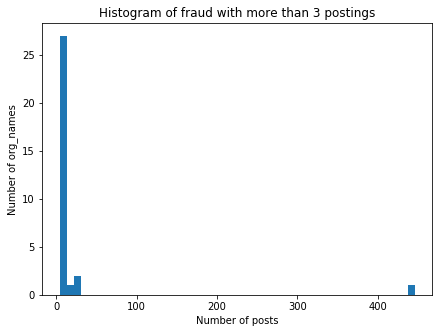

In [43]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(FL2,bins=50);
plt.xlabel('Number of posts');
plt.ylabel('Number of org_names');
ax.set_title('Histogram of fraud with more than 3 postings');

## Summary of EDA

In [44]:
print("number of org names: {}".format(unique_orgs))

number of org names: 9501


In [45]:
print("Number of posts by anonymous orgs: {}".format(N[0]))

Number of posts by anonymous orgs: 1462


In [46]:
print("Total number of frauds: {}".format(len(fraud_df3)))

Total number of frauds: 1293


In [47]:
print("Number of frauds by anonymous orgs: {}".format(fraud_M['']))

Number of frauds by anonymous orgs: 446


## Adding a column for anonymous orgs

In [48]:
length = len(df_test['org_name'])
L_flag = []
for i in range(length):
    flag = len(df_test['org_name'][i]) == 0
    L_flag.append(flag)

In [49]:
len(L_flag)

14337

In [50]:
df4 = df_test[L_flag]

In [51]:
df_test['org_name_bool'] = L_flag
df_test[['org_name_bool','org_name']]

,org_name_bool,org_name
0,False,Party Starz Ent & Diverse Int'l Group
1,False,RUF at Winthrop University
2,False,University Preparation School in collaboration...
3,True,
4,False,Arts & Business Council of Greater Boston
5,False,Bluegrass Stallions Basketball
6,False,NABOE Business Owner Networking
7,False,The Magnetic Theatre
8,True,
9,False,The Magnetic Theatre
